# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [84]:
pip install palmerpenguins

In [85]:
import pandas as pd
from palmerpenguins import load_penguins
from plotnine import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np



penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [86]:
data = pd.get_dummies(penguins, columns=['island', 'sex'])
data = data.dropna()
X = data.drop(columns="species")
y = data["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#data.head()

In [88]:
data = pd.get_dummies(penguins, columns=['island', 'sex'])
penguins['gentoo'] = (penguins['species'] == 'Gentoo').astype(int)
XG = data.drop(columns="gentoo")
yG = data["gentoo"]
X_trainG, X_testG, y_trainG, y_testG = train_test_split(XG, yG, random_state=1)
#data

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

Knn n= 3

In [89]:
ct_knn = ColumnTransformer(
    [
        ("dummify",
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize",
         StandardScaler(),
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

knn_pipeline1 = Pipeline(
    [
        ("preprocessing", ct_knn),
        ("knn", KNeighborsClassifier(n_neighbors=3))
    ]
).set_output(transform="pandas")



Confusion Matrix

In [90]:
knn_pipeline1.fit(X_train, y_train)
y_pred = knn_pipeline1.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = ["Adelie", "Chinstrap", "Gentoo"]
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)
conf_matrix_df

,Adelie,Chinstrap,Gentoo
Adelie,38,0,0
Chinstrap,0,21,0
Gentoo,0,0,27


Overall accuracy

In [91]:
scores1 = cross_val_score(knn_pipeline1, X, y, cv=5, scoring='accuracy').mean()
scores1


0.994160272804774

Precision

In [92]:
precision1 = precision_score(y_test, y_pred, average="weighted")
precision1

1.0

Recall

In [93]:
recall1 = recall_score(y_test, y_pred, average="weighted")
recall1

1.0

AUC

In [94]:
y_predp1 = knn_pipeline1.predict_proba(X_test)
roc_auc1 = roc_auc_score(y_test, y_predp1, multi_class="ovr", average="weighted")
roc_auc1

1.0

F1-score

In [95]:
f1_1 = f1_score(y_test, y_pred, average="weighted")
f1_1

1.0

Roc plot Species=Gentoo

In [96]:
y_test_g = y_test == 'Gentoo'
y_predG = knn_pipeline1.predict_proba(X_test)[:, 2]

In [97]:
fpr, tpr, thresholds = roc_curve(y_test_g, y_predG)
roc = pd.DataFrame({'False Positive Rate': fpr,'True Positive Rate': tpr,'Threshold': thresholds})


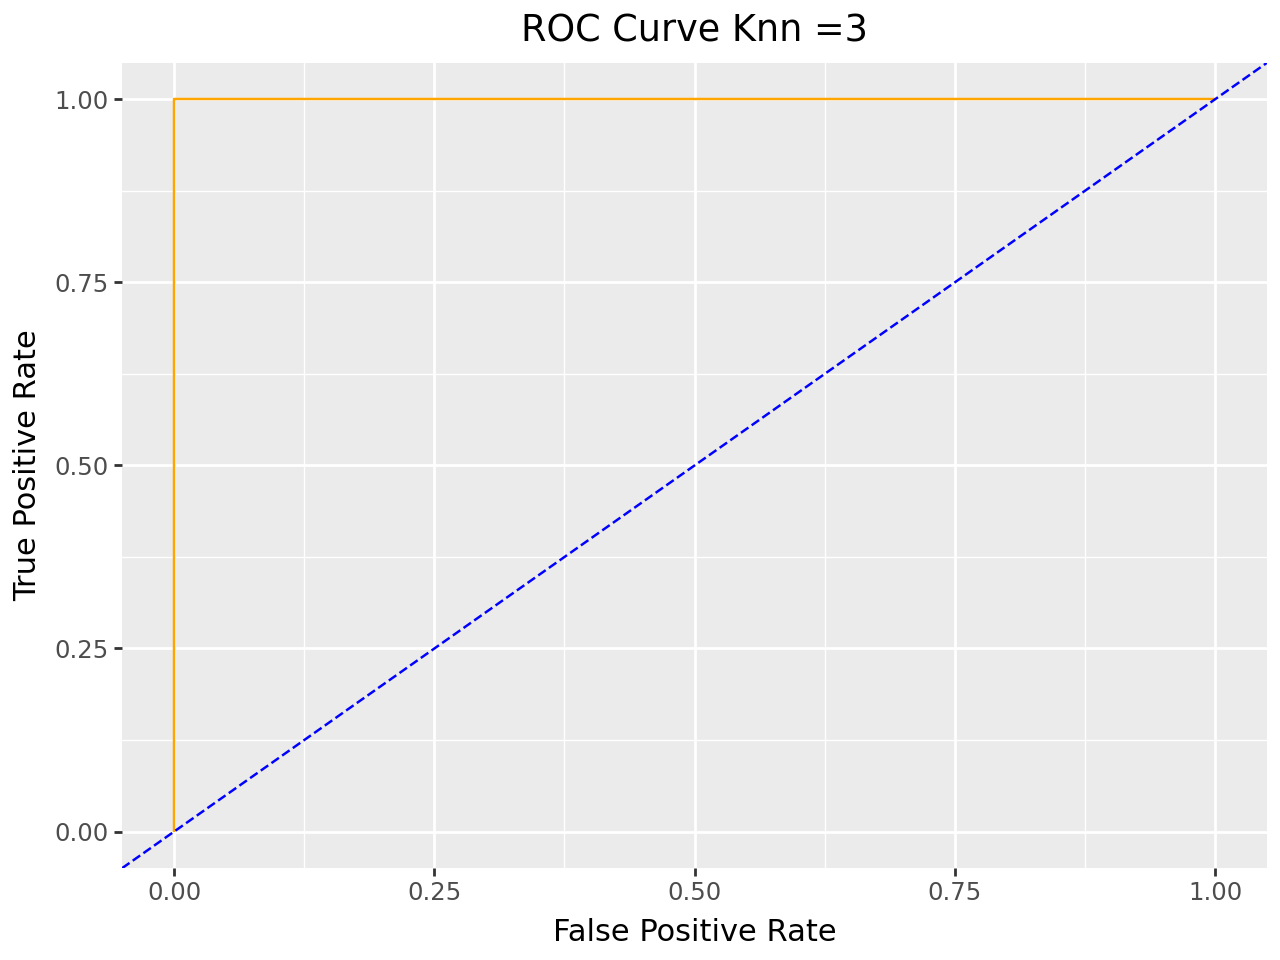

In [98]:
(ggplot(roc, aes(x='False Positive Rate', y='True Positive Rate')) +
    geom_line(color='orange') +
    geom_abline(slope=1, intercept=0, linetype='dashed', color='blue') +
    labs(
        title='ROC Curve Knn =3',
        x='False Positive Rate',
        y='True Positive Rate'
    )
)


knn n= 6

In [99]:
ct_knn = ColumnTransformer(
    [
        ("dummify",
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize",
         StandardScaler(),
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

knn_pipeline2 = Pipeline(
    [
        ("preprocessing", ct_knn),
        ("knn", KNeighborsClassifier(n_neighbors=6))
    ]
).set_output(transform="pandas")



Confusion Matrix

In [100]:
knn_pipeline2.fit(X_train, y_train)
y_pred = knn_pipeline2.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = ["Adelie", "Chinstrap", "Gentoo"]
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)
conf_matrix_df

,Adelie,Chinstrap,Gentoo
Adelie,38,0,0
Chinstrap,1,20,0
Gentoo,0,0,27


Overall accuracy

In [101]:
scores2 = cross_val_score(knn_pipeline2, X, y, cv=5, scoring='accuracy').mean()
scores2

0.994160272804774

Precision

In [102]:
precision2 = precision_score(y_test, y_pred, average="weighted")
precision2

0.9886702444841979

Recall

In [103]:
recall2 = recall_score(y_test, y_pred, average="weighted")
recall2

0.9883720930232558

AUC

In [104]:
y_predp2 = knn_pipeline1.predict_proba(X_test)
roc_auc2 = roc_auc_score(y_test, y_predp2, multi_class="ovr", average="weighted")
roc_auc2

1.0

F1-score

In [105]:
f1_1 = f1_score(y_test, y_pred, average="weighted")
f1_1

0.9883057951690964

Roc plot Species=Gentoo

In [106]:
y_test_g = y_test == 'Gentoo'
y_predG = knn_pipeline2.predict_proba(X_test)[:, 2]


In [107]:
fpr, tpr, thresholds = roc_curve(y_test_g, y_predG)
roc = pd.DataFrame({'False Positive Rate': fpr,'True Positive Rate': tpr,'Threshold': thresholds})



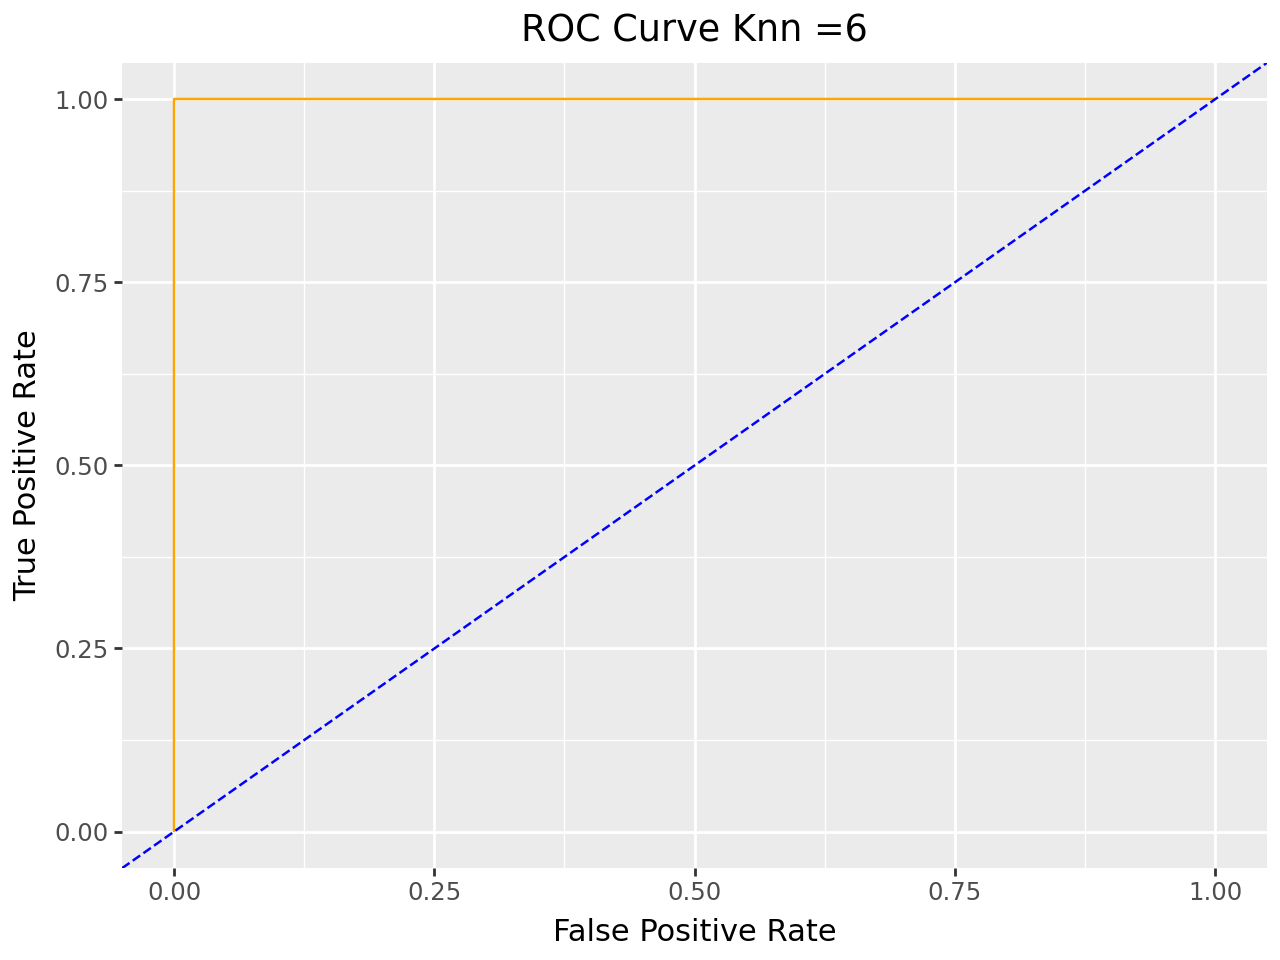

In [108]:
(ggplot(roc, aes(x='False Positive Rate', y='True Positive Rate')) +
    geom_line(color='orange') +
    geom_abline(slope=1, intercept=0, linetype='dashed', color='blue') +
    labs(
        title='ROC Curve Knn =6',
        x='False Positive Rate',
        y='True Positive Rate'
    )
)




```
# This is formatted as code
```

decision tree complexity=

In [109]:
ct_tree = ColumnTransformer(
    [
        ("dummify",
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize",
         StandardScaler(),
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

tree_pipeline1 = Pipeline(
    [ ("preprocessing", ct_tree),
        ("tree", DecisionTreeClassifier(min_impurity_decrease=0.01))
    ]
).set_output(transform="pandas")

Confusion Matrix

In [110]:
tree_pipeline1.fit(X_train, y_train)
y_pred = tree_pipeline1.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = ["Adelie", "Chinstrap", "Gentoo"]
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)
conf_matrix_df

,Adelie,Chinstrap,Gentoo
Adelie,38,0,0
Chinstrap,1,20,0
Gentoo,0,0,27


Overall accuracy

In [111]:
scores = cross_val_score(tree_pipeline1, X, y, cv=5, scoring='accuracy').mean()
scores

0.9648763853367435

Precision

In [112]:
precision3 = precision_score(y_test, y_pred, average="weighted")
precision3

0.9886702444841979

Recall

In [113]:
recall3 = recall_score(y_test, y_pred, average="weighted")
recall3

0.9883720930232558

AUC

In [114]:
y_predp3 = tree_pipeline1.predict_proba(X_test)
roc_auc3 = roc_auc_score(y_test, y_predp3, multi_class="ovr", average="weighted")
roc_auc3

0.9894622093023255

F1=score

In [115]:
f1_3 = f1_score(y_test, y_pred, average="weighted")
f1_3

0.9883057951690964

Roc plot Species=Gentoo

In [116]:
y_test_g = y_test == 'Gentoo'
y_predG = tree_pipeline1.predict_proba(X_test)[:, 2]

In [117]:
fpr, tpr, thresholds = roc_curve(y_test_g, y_predG)
roc = pd.DataFrame({'False Positive Rate': fpr,'True Positive Rate': tpr,'Threshold': thresholds})


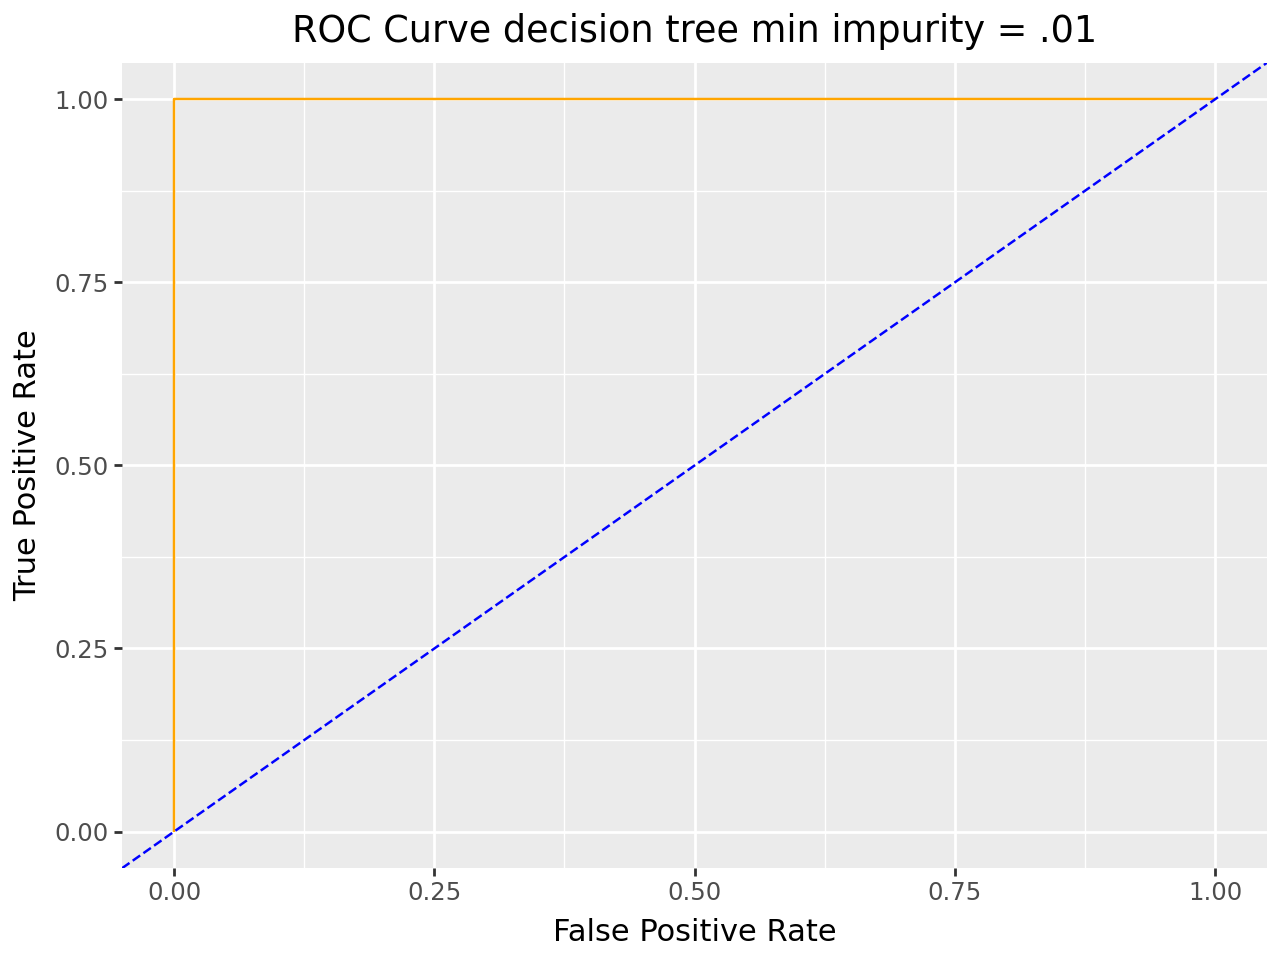

In [118]:
(ggplot(roc, aes(x='False Positive Rate', y='True Positive Rate')) +
    geom_line(color='orange') +
    geom_abline(slope=1, intercept=0, linetype='dashed', color='blue') +
    labs(
        title='ROC Curve decision tree min impurity = .01',
        x='False Positive Rate',
        y='True Positive Rate'
    )
)

decision tree complexity=

In [119]:
ct_tree = ColumnTransformer(
    [
        ("dummify",
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize",
         StandardScaler(),
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

tree_pipeline2 = Pipeline(
    [ ("preprocessing", ct_tree),
        ("tree", DecisionTreeClassifier(min_impurity_decrease=0.1))
    ]
).set_output(transform="pandas").set_output(transform="pandas")

Confusion Matrix

In [120]:
tree_pipeline2.fit(X_train, y_train)
y_pred = tree_pipeline2.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = ["Adelie", "Chinstrap", "Gentoo"]
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)
conf_matrix_df

,Adelie,Chinstrap,Gentoo
Adelie,37,1,0
Chinstrap,2,17,2
Gentoo,0,0,27


Overall accuracy

In [121]:
scores = cross_val_score(tree_pipeline2, X, y, cv=5, scoring='accuracy').mean()
scores

0.9384484228473997

Precision

In [122]:
precision4 = precision_score(y_test, y_pred, average="weighted")
precision4

0.942122632780211

Recall

In [123]:
recall4 = recall_score(y_test, y_pred, average="weighted")
recall4

0.9418604651162791

AUC

In [124]:
y_predp4 = tree_pipeline2.predict_proba(X_test)
roc_auc4 = roc_auc_score(y_test, y_predp4, multi_class="ovr", average="weighted")
roc_auc4

0.956248894565558

F1=score

In [125]:
y_predp4 = tree_pipeline2.predict_proba(X_test)
roc_auc4 = roc_auc_score(y_test, y_predp4, multi_class="ovr", average="weighted")
roc_auc4

0.956248894565558

Roc plot Species=Gentoo

In [126]:
y_test_g = y_test == 'Gentoo'
y_predG = tree_pipeline1.predict_proba(X_test)[:, 2]

In [127]:
fpr, tpr, thresholds = roc_curve(y_test_g, y_predG)
roc = pd.DataFrame({'False Positive Rate': fpr,'True Positive Rate': tpr,'Threshold': thresholds})


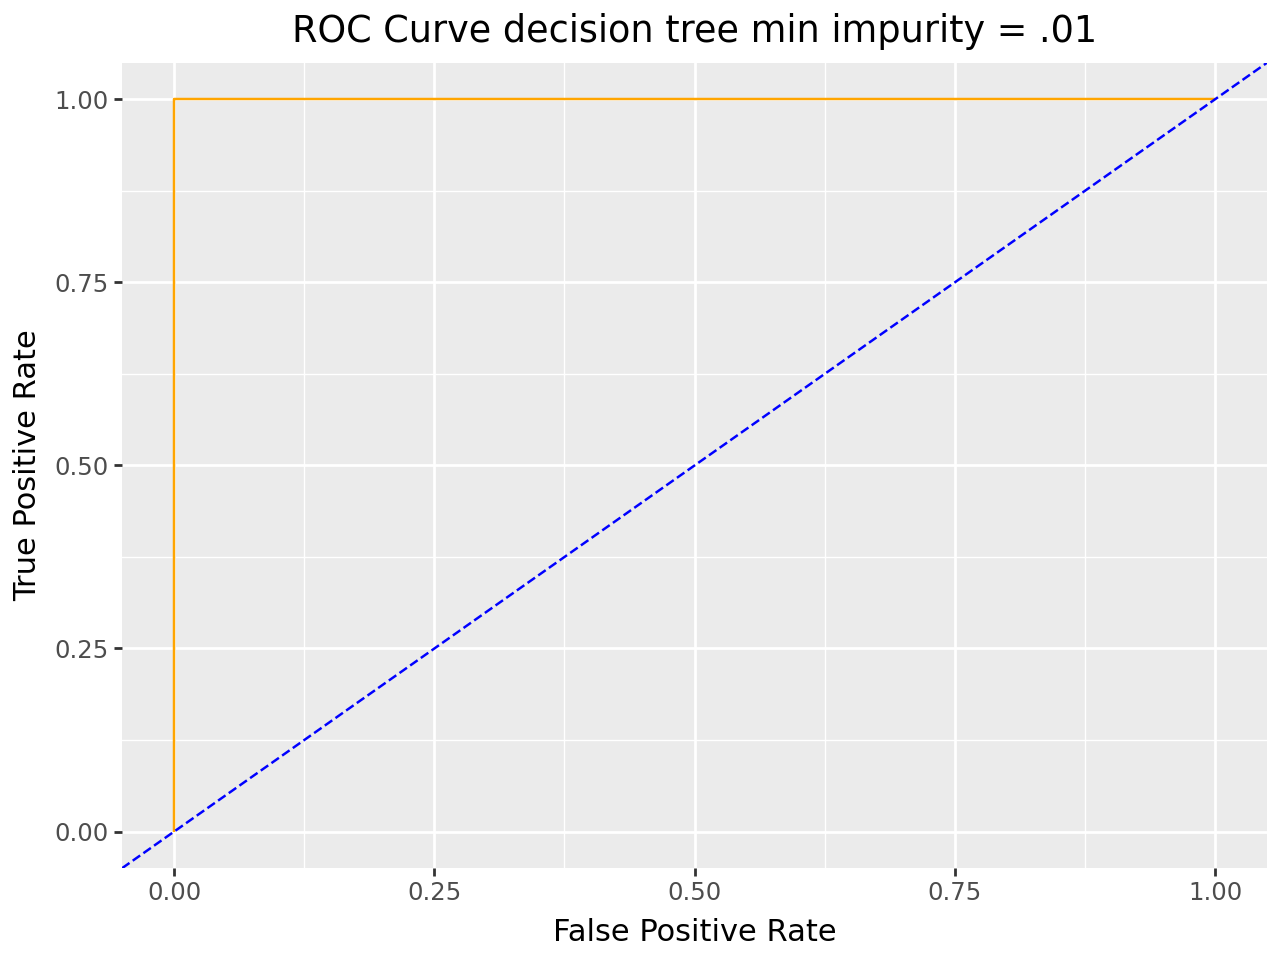

In [128]:
(ggplot(roc, aes(x='False Positive Rate', y='True Positive Rate')) +
    geom_line(color='orange') +
    geom_abline(slope=1, intercept=0, linetype='dashed', color='blue') +
    labs(
        title='ROC Curve decision tree min impurity = .01',
        x='False Positive Rate',
        y='True Positive Rate'
    )
)